In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
bm=pd.read_csv("F:/DATA/Python/bigmart_train.csv")

In [3]:
bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bm.shape

(8523, 12)

In [5]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
bm.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [7]:
bm.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
bm.Item_Weight=bm.Item_Weight.fillna(bm.Item_Visibility.mean())
bm.Outlet_Size=bm.Outlet_Size.fillna("Median")

In [9]:
# the data is free of navalues now
bm.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
bm.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [12]:
bm.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
bm.Item_Fat_Content.replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"},inplace=True)

In [14]:
bm.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [15]:
# now we create a new feature for outlet establishment year,
# since the data is from 2013 we can calculate the years from establishment to 2013
bm["Outlet_Operational_Year"]= 2020-bm.Outlet_Establishment_Year

In [16]:
bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Operational_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [17]:
bm.drop(["Outlet_Establishment_Year"],axis=1,inplace=True)

In [18]:
# the data looks Okay, not skewed , so no need for removal of outliers
bm.skew()

Item_Weight               -0.269146
Item_Visibility            1.167091
Item_MRP                   0.127202
Item_Outlet_Sales          1.177531
Outlet_Operational_Year    0.396641
dtype: float64

In [19]:
def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x>mean- k*sd)]
    final_list=[x for x in final_list if (x < mean + k*sd)]
    df1=df.loc[df[col].isin(final_list)];print(df1.shape);return df1
    
    

In [20]:
bm=remove_outliers(bm,"Item_Outlet_Sales",k=3)

(8433, 12)


In [21]:
bm.skew()

Item_Weight               -0.277637
Item_Visibility            1.165796
Item_MRP                   0.137074
Item_Outlet_Sales          0.885157
Outlet_Operational_Year    0.410554
dtype: float64

In [22]:
bm.drop(["Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [23]:
bm.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Operational_Year
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,11


In [24]:
bm.shape

(8433, 10)

In [25]:
# Now we do label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
bm[bm.select_dtypes(include="object").columns] =bm[bm.select_dtypes(include="object").columns].apply(le.fit_transform)

In [27]:
bm.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Operational_Year
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,21
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,11
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,21
3,19.20,1,0.000000,6,182.0950,1,2,0,732.3800,22
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052,33


In [28]:
bm.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Operational_Year
Item_Weight,1.000000,-0.011771,-0.080494,0.021290,0.036168,-0.118161,-0.054483,-0.289853,-0.015233,-0.511470
Item_Fat_Content,-0.011771,1.000000,0.047929,-0.137604,0.006156,-0.000852,-0.002187,0.001738,0.020195,-0.003576
Item_Visibility,-0.080494,0.047929,1.000000,-0.035180,0.000353,0.069466,-0.026862,-0.173845,-0.131656,0.078321
Item_Type,0.021290,-0.137604,-0.035180,1.000000,0.033453,-0.001464,0.002379,0.001920,0.016826,-0.005795
Item_MRP,0.036168,0.006156,0.000353,0.033453,1.000000,0.009257,-0.008009,-0.021310,0.563164,-0.017501
Outlet_Size,-0.118161,-0.000852,0.069466,-0.001464,0.009257,1.000000,-0.614749,-0.201163,-0.084388,-0.191119
Outlet_Location_Type,-0.054483,-0.002187,-0.026862,0.002379,-0.008009,-0.614749,1.000000,0.460454,0.069114,0.077489
Outlet_Type,-0.289853,0.001738,-0.173845,0.001920,-0.021310,-0.201163,0.460454,1.000000,0.380454,0.100345
Item_Outlet_Sales,-0.015233,0.020195,-0.131656,0.016826,0.563164,-0.084388,0.069114,0.380454,1.000000,0.012554
Outlet_Operational_Year,-0.511470,-0.003576,0.078321,-0.005795,-0.017501,-0.191119,0.077489,0.100345,0.012554,1.000000


In [29]:
bm_x= bm.iloc[:,[0,1,2,3,4,5,6,7,9]]
bm_y=bm.iloc[:,8]

In [30]:
# sampling
from sklearn.model_selection import train_test_split


In [31]:
bm_x_train, bm_x_test, bm_y_train, bm_y_test= train_test_split(bm_x , bm_y, test_size= .25)

# Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(normalize=True)

In [33]:
reg.fit(bm_x_train,bm_y_train)

LinearRegression(normalize=True)

In [34]:
pred_reg= reg.predict(bm_x_test)

In [35]:
error_reg= bm_y_test-pred_reg

In [36]:
# now we check R2 and adjR2

Rsquare= reg.score(bm_x_train,bm_y_train)
Rsquare

0.5012053969487877

In [37]:
#Adjusted Rsquare

N=bm_x_train.shape[0]
K=bm_x_train.shape[1]

Adjusted_Rsquare= 1-(1-Rsquare)*(N-1)/(N-K-1)
print("value of Adjusted_Rsquare is ", Adjusted_Rsquare)

value of Adjusted_Rsquare is  0.5004944131940425


In [38]:
#MAPE
MAPE=np.mean(np.abs(error_reg/bm_y_test)*100)
MAPE

94.10776136256891

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
Rmse= np.sqrt(mean_squared_error(bm_y_test,pred_reg))
Rmse

1111.2434727555187

In [4]:
from sklearn.model_selection import cross_val_score

In [5]:
cvs=cross_val_score(reg,bm_x_train,bm_y_train,cv=5, scoring="r2")
cvs.mean()

NameError: name 'reg' is not defined

In [59]:
reg.coef_

array([   20.94501677,    72.61101136, -1428.4101119 ,    -1.48960261,
          14.440593  ,  -262.97311798,  -407.36273386,   976.53761893,
           3.31962548])

In [ ]:
reg.fit(bm_x_train,bm_y_train)

In [70]:
reg_train= reg.predict(bm_x_train)

In [71]:
error_train= bm_y_train- reg_train

(array([  11.,  104.,  515., 1496., 2160., 1198.,  538.,  215.,   72.,
          15.]),
 array([-3861.54149237, -3014.1849951 , -2166.82849783, -1319.47200056,
         -472.11550329,   375.24099398,  1222.59749124,  2069.95398851,
         2917.31048578,  3764.66698305,  4612.02348032]),
 <BarContainer object of 10 artists>)

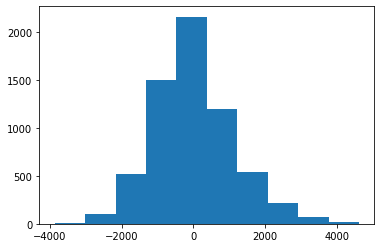

In [72]:
plt.hist(error_train)

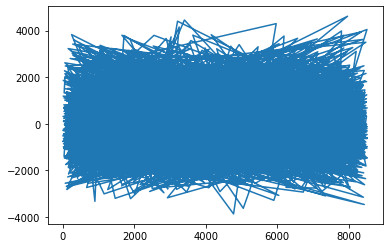

In [73]:
plt.plot(error_train)

In [74]:
df=pd.DataFrame({"actual":bm_y_train, "pred":reg_train})
df

,actual,pred
8114,223.7088,1154.393405
8337,193.7478,1713.260663
861,126.5020,-377.621039
4538,1324.9420,2645.645722
4965,2285.0256,1864.147533
...,...,...
8001,4233.1564,3229.105823
5403,2624.5836,2790.246139
2377,5141.3076,3063.360755
8430,4042.7376,2740.747222


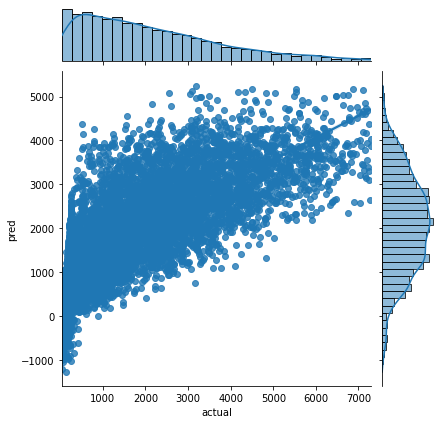

In [75]:
sns.jointplot(x="actual",y="pred" ,kind="reg",data=df)

TypeError: float() argument must be a string or a number, not 'LinearRegression'

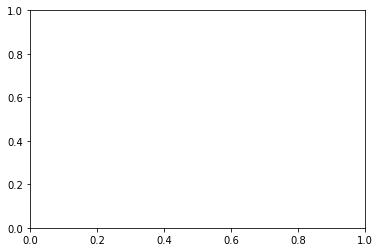

# Random forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,max_depth=6)

In [46]:
rf.fit(bm_x_train,bm_y_train)

RandomForestRegressor(max_depth=6, n_estimators=200)

In [47]:
Rsquare=rf.score(bm_x_train,bm_y_train)
Rsquare

0.6146873545553093

In [48]:

N=bm_x_train.shape[0]
K=bm_x_train.shape[1]

Adjusted_Rsquare= 1-(1-Rsquare)*(N-1)/(N-K-1)
print("value of Adjusted_Rsquare is ", Adjusted_Rsquare)

value of Adjusted_Rsquare is  0.6141381284214793


In [49]:
pred_ran=rf.predict(bm_x_test)

In [50]:
error_rf= bm_y_test- pred_ran

In [51]:
cvs=cross_val_score(rf,bm_x_train,bm_y_train,cv=5,scoring="r2")
cvs.mean()

0.5881466968669298

In [52]:
Rmse= np.sqrt(mean_squared_error(bm_y_test,pred_ran))
Rmse

1010.6080397813787

In [51]:
#MAPE
MAPE=np.mean(np.abs(error_rf/bm_y_test)*100)
MAPE

56.28595382720428

# XGboost

In [52]:
#pip install XGBOOST

In [53]:
from xgboost import XGBRegressor
xg=XGBRegressor(n_estimators=130,max_depth=3,learning_rate=0.15,subsample=0.7)

In [54]:
xg.fit(bm_x_train,bm_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=130, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
pred_xg= xg.predict(bm_x_test)
error_xg=bm_y_test-pred_xg
Rsquare=xg.score(bm_x_train,bm_y_train)
print("Rsquare: " ,Rsquare)
N=bm_x_train.shape[0]
K=bm_x_train.shape[1]

Adjusted_Rsquare= 1-(1-Rsquare)*(N-1)/(N-K-1)
print("value of Adjusted_Rsquare is ", Adjusted_Rsquare)

Rsquare:  0.65383474443953
value of Adjusted_Rsquare is  0.6533413191465234


In [56]:
#MAPE
MAPE=np.mean(np.abs(error_xg/bm_y_test)*100)
print("MAPE values is: " ,MAPE)
Rmse= np.sqrt(mean_squared_error(bm_y_test,pred_xg))
print("Rmse value is: ", Rmse)

MAPE values is:  55.224928127224395
Rmse value is:  1019.4124331490901


In [57]:
cv=cross_val_score(xg,bm_x_train,bm_y_train,cv=5,scoring="r2")
cv.mean()

0.5795884176259969

In [252]:
# Random forest xgboost

In [497]:
from xgboost import XGBRFRegressor

In [517]:
xgrf= XGBRFRegressor(learning_rate=0.1)

In [518]:
xgrf.fit(bm_x_train,bm_y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
               max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=0,
               num_parallel_tree=100, objective='reg:squarederror',
               random_state=0, reg_alpha=0, scale_pos_weight=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [519]:
pred_xgbrf=xgrf.predict(bm_x_test)

In [520]:
error_xgbrf= bm_y_test- pred_xgbrf

In [521]:
Rsquare=xgrf.score(bm_x_train,bm_y_train)
Rsquare

-1.3342949421961832

In [515]:
Rmse= np.sqrt(mean_squared_error(bm_y_test,pred_xgbrf))
Rmse

4958.999139829064

In [516]:
#MAPE
MAPE=np.mean(np.abs(error_xgbrf/bm_y_test)*100)
MAPE

298.8533400622089

In [60]:
xg.feature_importances_

array([0.06600729, 0.01961498, 0.02326529, 0.01993659, 0.16275916,
       0.02073168, 0.0196675 , 0.6368456 , 0.03117186], dtype=float32)

In [ ]:
# test dataset

In [337]:
bmt=pd.read_csv("F:/DATA/Python/bigmart_tes.csv")

In [338]:
bmt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [339]:
bmt.shape

(5681, 11)

In [340]:
bmt.Item_Weight=bmt.Item_Weight.fillna(bmt.Item_Visibility.mean())
bmt.Outlet_Size=bmt.Outlet_Size.fillna("Medium")

In [341]:
bmt.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [342]:
bmt.Item_Fat_Content.replace({"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"},inplace=True)

In [343]:
bmt["Outlet_Operational_Year"]=2020-bmt.Outlet_Establishment_Year

In [344]:
bmt=bmt.iloc[:,[1,2,3,4,5,8,9,10,11]]

In [345]:
bmt.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Operational_Year
0,20.75,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,21


In [346]:
bmt[bmt.select_dtypes(include="object").columns] =bmt[bmt.select_dtypes(include="object").columns].apply(le.fit_transform)

In [347]:
bmt.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Operational_Year
0,20.75,0,0.007565,13,107.8622,1,0,1,21


In [527]:
pred_final= xg.predict(bmt)

In [489]:
b= pd.read_csv("F:/DATA/Python/bigmart_tes.csv")

In [490]:
b=b.iloc[:,[0,6]]

In [491]:
b.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [492]:
 Item_Outlet_Sales= pd.DataFrame(pred_final)

In [493]:
Item_Outlet_Sales.rename(columns={0:"Item_Outlet_Sales"},inplace=True)

In [494]:
solution_bigmart=pd.concat([b,Item_Outlet_Sales],axis=1)

In [495]:
solution_bigmart.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1630.811702
1,FDW14,OUT017,1386.337466
2,NCN55,OUT010,583.290634
3,FDQ58,OUT017,2444.429111
4,FDY38,OUT027,5255.063073


In [496]:
solution_bigmart.to_csv("F:/DATA/solution_bigmart_rf.csv",index=False)

In [358]:
solution_bigmart.Item_Outlet_Sal

3107.729980    4
2800.608154    3
346.849182     3
323.012878     3
1251.839600    2
              ..
4458.583008    1
334.662567     1
688.568298     1
2154.695068    1
2560.002930    1
Name: Item_Outlet_Sales, Length: 5617, dtype: int64